In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from keras.optimizers import Optimizer
from keras import optimizers

/anaconda2/envs/pyy36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("CropTrainFinal.csv")
df_test = pd.read_csv("CropTestFinal.csv")
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [3]:
df_train.head(10)

,Area,Production,Rainfall,Season,Temperature,Crop
0,7800.0,3200.0,30.400333,Kharif,28.007000,Moong(Green Gram)
1,39922.0,75572.0,111.901000,Kharif,27.232333,Maize
2,44656.0,49099.0,3.396500,Rabi,20.277000,Wheat
3,6540.0,3945.0,30.932500,Rabi,24.241500,Wheat
4,2911.0,2062.0,189.208333,Kharif,27.456333,Maize
5,7.0,2.0,21.609750,Rabi,23.570000,Moong(Green Gram)
6,18.0,21.0,206.319750,Summer,28.760250,Groundnut
7,39157.0,1878596.0,186.938333,Kharif,27.940667,Sugarcane
8,10562.0,16812.0,81.593333,Kharif,26.181000,Jowar
9,179.0,2174.0,68.501750,Rabi,24.139750,Potato


In [4]:
y_train = df_train['Production']
y_test = df_test['Production']
df_train = df_train.drop(['Production'], axis=1)
df_test = df_test.drop(['Production'], axis=1)

In [5]:
df_train.head(10)

,Area,Rainfall,Season,Temperature,Crop
0,7800.0,30.400333,Kharif,28.007000,Moong(Green Gram)
1,39922.0,111.901000,Kharif,27.232333,Maize
2,44656.0,3.396500,Rabi,20.277000,Wheat
3,6540.0,30.932500,Rabi,24.241500,Wheat
4,2911.0,189.208333,Kharif,27.456333,Maize
5,7.0,21.609750,Rabi,23.570000,Moong(Green Gram)
6,18.0,206.319750,Summer,28.760250,Groundnut
7,39157.0,186.938333,Kharif,27.940667,Sugarcane
8,10562.0,81.593333,Kharif,26.181000,Jowar
9,179.0,68.501750,Rabi,24.139750,Potato


In [6]:
cr = LabelEncoder()
se = LabelEncoder()
df_train['Season'] = se.fit_transform(df_train['Season'])
df_train['Crop'] = cr.fit_transform(df_train['Crop'])
df_test['Season'] = se.transform(df_test['Season'])
df_test['Crop'] = cr.transform(df_test['Crop'])

In [7]:
x_train = df_train.values

In [8]:
x_test = df_test.values

In [9]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [10]:
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
y_pred = clf.predict(x_test)

In [13]:
maerandom = mean_absolute_error(y_test, y_pred)
maerandom

21629.736639674164

In [14]:
# applying neural network
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((85225, 5), (85225,), (21307, 5), (21307,))

In [15]:
# scaling data:
scaler = StandardScaler()
x_trainscaled = scaler.fit_transform(x_train)
x_testscaled = scaler.transform(x_test)

In [16]:
# randomForest on scaled data:
clf1=RandomForestRegressor()
clf1.fit(x_trainscaled,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
ypredranscaled=clf1.predict(x_testscaled)

In [18]:
maerandomscaled = mean_absolute_error(ypredranscaled,y_test)

In [19]:
maerandomscaled

22056.62343991171

In [20]:
randommeanlist = [maerandom, maerandomscaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0,0.5,'Mean Absolute Error')

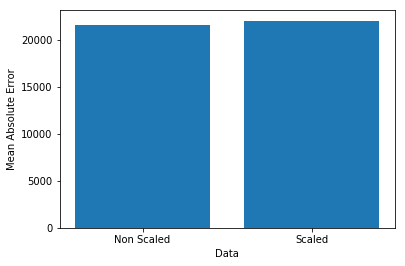

In [21]:
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [22]:
# keras implementation.

In [23]:
sgd = optimizers.SGD(lr=0.1, clipnorm = 1, nesterov = True)
model = Sequential()
model.add(Dense(256, input_dim = 5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_absolute_error', optimizer='nadam')

In [24]:
model.fit(x_trainscaled, y_train, epochs=50, batch_size=50)

Epoch 1/50
85225/85225 [==============================] - 5s 56us/step - loss: 63332.2547
Epoch 2/50
85225/85225 [==============================] - 5s 61us/step - loss: 59158.8580
Epoch 3/50
85225/85225 [==============================] - 6s 65us/step - loss: 58769.6632
Epoch 4/50
85225/85225 [==============================] - 6s 68us/step - loss: 58471.3830
Epoch 5/50
85225/85225 [==============================] - 5s 60us/step - loss: 58237.4941
Epoch 6/50
85225/85225 [==============================] - 5s 60us/step - loss: 58018.7693
Epoch 7/50
85225/85225 [==============================] - 5s 59us/step - loss: 57805.6602
Epoch 8/50
85225/85225 [==============================] - 5s 56us/step - loss: 57550.1340
Epoch 9/50
85225/85225 [==============================] - 4s 51us/step - loss: 57246.0630
Epoch 10/50
85225/85225 [==============================] - 5s 55us/step - loss: 56901.1743
Epoch 11/50
85225/85225 [==============================] - 5s 59us/step - loss: 56473.5011
Epoch 12

In [25]:
ypredkeras = model.predict(x_testscaled)
maekeras_scaled=mean_absolute_error(y_test, ypredkeras)

In [26]:
# best mean_abs_error by using nadam as optimizer and scaled data. (51K)
# ypredkeras = model.predict(x_testscaled)
# mean_absolute_error(y_test, ypredkeras)

In [27]:
sgd = optimizers.SGD(lr=0.1, clipnorm = 1, nesterov = True)
model1 = Sequential()
model1.add(Dense(256, input_dim = 5, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='mean_absolute_error', optimizer='nadam')

In [28]:
model1.fit(x_train, y_train, epochs=50, batch_size=50)

Epoch 1/50
85225/85225 [==============================] - 6s 71us/step - loss: 61357.2297
Epoch 2/50
85225/85225 [==============================] - 6s 73us/step - loss: 61147.7451
Epoch 3/50
85225/85225 [==============================] - 7s 78us/step - loss: 61051.4382
Epoch 4/50
85225/85225 [==============================] - 6s 76us/step - loss: 61018.1301
Epoch 5/50
85225/85225 [==============================] - 6s 71us/step - loss: 60956.8487
Epoch 6/50
85225/85225 [==============================] - 5s 60us/step - loss: 60943.2368
Epoch 7/50
85225/85225 [==============================] - 5s 55us/step - loss: 60884.4560
Epoch 8/50
85225/85225 [==============================] - 5s 56us/step - loss: 60879.3811
Epoch 9/50
85225/85225 [==============================] - 5s 56us/step - loss: 60833.1357
Epoch 10/50
85225/85225 [==============================] - 5s 55us/step - loss: 60836.2863
Epoch 11/50
85225/85225 [==============================] - 4s 51us/step - loss: 60746.9602
Epoch 12

In [29]:
ypredkeras1 = model1.predict(x_test)
maekeras=mean_absolute_error(y_test, ypredkeras1)

In [30]:
kerasmeanlist = [maekeras, maekeras_scaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0,0.5,'Mean Absolute Error')

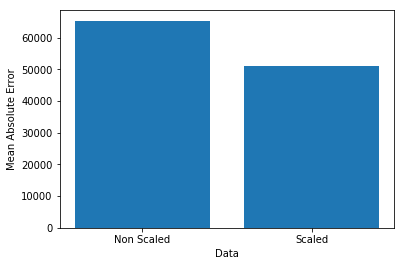

In [31]:
plt.bar(namerandom,kerasmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [32]:
# Using GridSearch to optimise randomforest:
from sklearn.grid_search import GridSearchCV
rfc = RandomForestRegressor()
para_grid = {
    'n_estimators' : [20, 50, 100], 
}
cv_rfc = GridSearchCV(estimator = rfc, param_grid = para_grid, cv = 3)
cv_rfc.fit(x_trainscaled, y_train)

/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 50, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [33]:
yp1=cv_rfc.predict(x_testscaled)

In [34]:
mae1=mean_absolute_error(yp1,y_test)

In [35]:
mae1

20875.30337799901

In [36]:
from sklearn.linear_model import LinearRegression
clf_linear = LinearRegression()
clf_linear.fit(x_train, y_train)
ypredlinear = clf_linear.predict(x_test)
maelinear=mean_absolute_error(y_test, ypredlinear)
# on scaled data:
clf_linearscaled = LinearRegression()
clf_linearscaled.fit(x_trainscaled, y_train)
ypredlinearscaled = clf_linearscaled.predict(x_testscaled)
maelinearscaled=mean_absolute_error(y_test, ypredlinearscaled)

In [37]:
linearmeanlist = [maelinear, maelinearscaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0,0.5,'Mean Absolute Error')

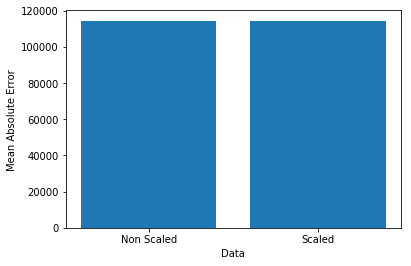

In [38]:
plt.bar(namerandom,linearmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [39]:
#KNN neighbor
from sklearn.neighbors import KNeighborsRegressor
clfKNN = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN.fit(x_train, y_train)
ypredknn = clfKNN.predict(x_test)
knnmae=mean_absolute_error(y_test, ypredknn)


In [40]:
clfKNN1 = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN1.fit(x_trainscaled, y_train)
ypredknnscaled = clfKNN1.predict(x_testscaled)
knnmaescaled=mean_absolute_error(y_test, ypredknnscaled)

In [41]:
knnmeanlist = [knnmae, knnmaescaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0,0.5,'Mean Absolute Error')

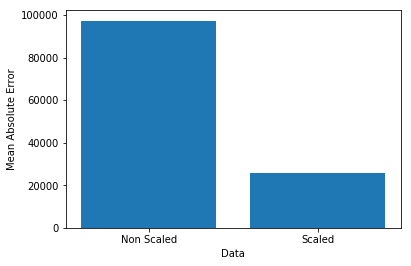

In [42]:
plt.bar(namerandom,knnmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [43]:
# testing on diff neighbors:
x_ax = []
y_ax = []
for i in range(1, 50, 2):
    clfk = KNeighborsRegressor(n_neighbors = i, algorithm='ball_tree')
    clfk.fit(x_trainscaled, y_train)
    ypredk = clfk.predict(x_testscaled)
    mae = mean_absolute_error(y_test, ypredk)
    print(mae)
    x_ax.append(i)
    y_ax.append(mae)

26661.50120225039
25533.936517413007
27422.734093380383
30067.60935208777
32293.24176143029
33817.187822733234
35349.788221545816
37089.143757712
37987.403234840895
38904.774003664956
39958.799063448896
40780.45054344655
41517.235142838486
42296.35020972603
42867.18166403326
43543.10131928543
44242.93627654956
44639.053734060195
45134.95610996703
45777.03399574648
46066.34673301473
46492.313421348124
46942.34549694481
47311.215121701134
47584.427475834316


Text(0,0.5,'Mean Absolute Error')

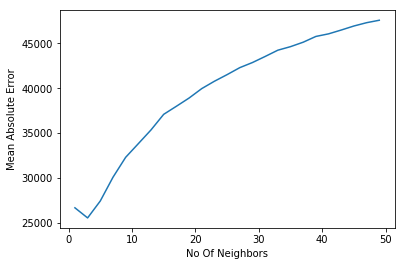

In [44]:
plt.plot(x_ax,y_ax)
plt.xlabel('No Of Neighbors')
plt.ylabel('Mean Absolute Error')

In [45]:
from sklearn.linear_model import SGDRegressor

In [46]:
clfsgd1=SGDRegressor()

In [47]:
clfsgd1.fit(x_trainscaled,y_train)

/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [48]:
ypredsgdscaled=clfsgd1.predict(x_testscaled)

In [49]:
maesgdscaled=mean_absolute_error(ypredsgdscaled,y_test)

In [50]:
clfsgd2=SGDRegressor()

In [51]:
clfsgd2.fit(x_train,y_train)

/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [52]:
ypredsgd=clfsgd2.predict(x_test)

In [53]:
maesgd=mean_absolute_error(ypredsgd,y_test)

In [54]:
sgdmeanlist = [maesgd, maesgdscaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0,0.5,'Mean Absolute Error')

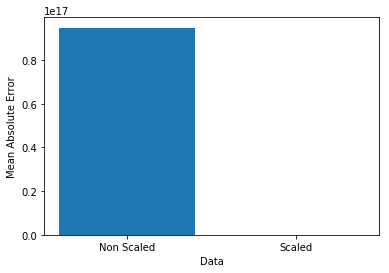

In [55]:
plt.bar(namerandom,sgdmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [56]:
maesgd,maesgdscaled

(9.48103484985441e+16, 100092.86591875159)

In [57]:
meanlist = [maelinear, maekeras,maerandom,knnmae,]
name = ['Linear Regression', 'Keras','Random Forest','KNN']

Text(0,0.5,'Mean Absolute Error')

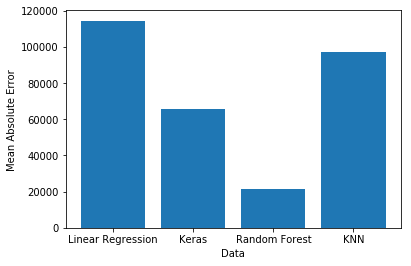

In [58]:
plt.bar(name,meanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [59]:
meanlistscaled = [maelinearscaled, maekeras_scaled,maerandomscaled,maesgdscaled,knnmaescaled]
name = ['Linear Regression', 'Keras','Random Forest','SGD','KNN']

Text(0,0.5,'Mean Absolute Error')

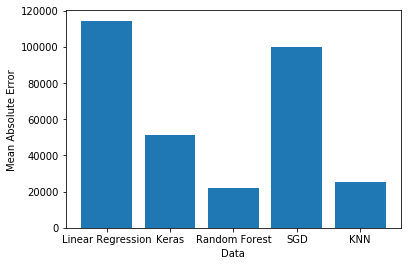

In [60]:
plt.bar(name,meanlistscaled)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [61]:
num=[]
for i in range(x_testscaled.shape[0]):
    num.append(i+1)

Text(0,0.5,'Production')

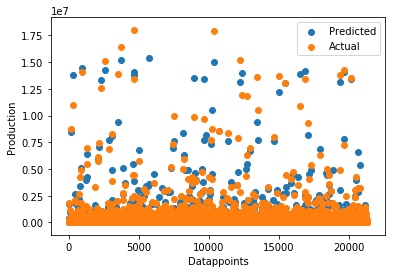

In [62]:
plt.scatter(num,ypredranscaled,label="Predicted")
plt.scatter(num,y_test,label="Actual")
plt.legend()
plt.xlabel("Datapoints")
plt.ylabel("Production")

In [ ]:
df_test.head(10)

In [63]:
test =  pd.read_csv("UttarPradeshData.csv")
test = test.drop(['Unnamed: 0'], axis=1)

In [64]:
test = test.drop(['0'], axis=1)

In [65]:
test.head(15)

,1,2,3,4,5,6,7
0,balrampur,2014,Kharif,Urad,108030.0,0.000000e+00,0.000000e+00
1,balrampur,2014,Kharif,Urad,84190.0,1.482197e-323,1.482197e-323
2,balrampur,2014,Kharif,Sugarcane,43539.0,6.952763e-310,0.000000e+00
3,balrampur,2014,Rabi,Wheat,90246.0,2.152572e-314,6.952764e-310
4,balrampur,2014,Rabi,Wheat,18087.0,0.000000e+00,1.976263e-323
5,balrampur,2014,Rabi,Rapeseed &Mustard,9629.0,0.000000e+00,0.000000e+00
6,agra,2014,Kharif,Urad,10164.0,1.149530e+02,2.829433e+01
7,agra,2014,Kharif,Sugarcane,1935.0,1.149530e+02,2.829433e+01
8,agra,2014,Kharif,Sesamum,495.0,1.149530e+02,2.829433e+01
9,agra,2014,Rabi,Wheat,136036.0,1.828000e+00,1.974325e+01


In [66]:
test.loc[7][0]

'agra'

In [67]:
testf = pd.DataFrame()
testf = testf.assign(area = test["5"])
testf = testf.assign(rainfall = test["6"])
testf = testf.assign(season = test["3"])
testf = testf.assign(temp = test["7"])
testf = testf.assign(crop = test["4"])

In [68]:
testf.head(10)

,area,rainfall,season,temp,crop
0,108030.0,0.000000e+00,Kharif,0.000000e+00,Urad
1,84190.0,1.482197e-323,Kharif,1.482197e-323,Urad
2,43539.0,6.952763e-310,Kharif,0.000000e+00,Sugarcane
3,90246.0,2.152572e-314,Rabi,6.952764e-310,Wheat
4,18087.0,0.000000e+00,Rabi,1.976263e-323,Wheat
5,9629.0,0.000000e+00,Rabi,0.000000e+00,Rapeseed &Mustard
6,10164.0,1.149530e+02,Kharif,2.829433e+01,Urad
7,1935.0,1.149530e+02,Kharif,2.829433e+01,Sugarcane
8,495.0,1.149530e+02,Kharif,2.829433e+01,Sesamum
9,136036.0,1.828000e+00,Rabi,1.974325e+01,Wheat


In [69]:
testf['season'] = se.transform(testf['season'])
testf['crop'] = cr.transform(testf['crop'])

In [ ]:
#Enter from following Districts:
1.Lucknow
2.Agra
3.Aligarh
4.Jaunpur
5.Pratapgarh
6.Saharanpur
7.Meerut
8.Mahoba
9.Kheri
10.Ghazipur
11.Etawah
12.Gorakhpur
13.Bareilly
14.Allahabad
15.Basti
16.Ghaziabad
17.Mathura
18.Moradabad
19.Philibhit
20.Sitapur

In [70]:
print("Enter name of district: ")
name = input()

Enter name of district: 
aligarh


In [71]:
name = name.lower()
name

'aligarh'

In [72]:
x = []
area = []
for i in range(len(test)):
    if test.loc[i][0] == name:
        df = pd.DataFrame()
        df = testf.loc[i]
        df = np.array(df)
        df = df.reshape((1, 5))
        df = pd.DataFrame(df)
        area.append((testf.loc[i][0], testf.loc[i][4]))
        x.append(df)

In [73]:
df = pd.concat(x)

In [74]:
df

,0,1,2,3,4
0,90420.0,122.114667,1.0,28.662333,13.0
0,14445.0,122.114667,1.0,28.662333,12.0
0,6645.0,122.114667,1.0,28.662333,11.0
0,223267.0,4.049500,2.0,19.588750,14.0
0,21683.0,4.049500,2.0,19.588750,9.0
0,19731.0,4.049500,2.0,19.588750,8.0


In [75]:
x=df.values

In [76]:
x=scaler.transform(x)

In [77]:
ypred = clf1.predict(x)

In [78]:
ypred

array([ 29857.3, 923708.6,   2964.9, 794300.1,  25039. , 430189.1])

In [79]:
type(ypred), type(area)

(numpy.ndarray, list)

In [80]:
ypred.shape, len(area)

((6,), 6)

In [81]:
yld = []
cnt=0
for i, j in area:
    yld.append((ypred[cnt] / i , j))
    cnt+=1

In [82]:
for i, j in yld:
    print(i, j)

0.33020681265206814 13.0
63.946597438560055 12.0
0.44618510158013547 11.0
3.557624279450165 14.0
1.1547756306784116 9.0
21.802701332927878 8.0


In [83]:
kharif = []
cnt=0
for i, j in yld:
    if cnt == 3:
        break
    kharif.append((i, j))
    cnt+=1
cnt=1
rabi = []
for i, j in yld:
    if cnt<=3:
        cnt+=1
        continue
    rabi.append((i, j))

In [84]:
len(kharif), len(rabi)

(3, 3)

In [85]:
kharif.sort(reverse = True)
rabi.sort(reverse = True)

In [86]:
len(kharif), len(rabi)

(3, 3)

In [87]:
anskharif = []
for i, j in kharif:
    print(i, j)
    j_ = cr.inverse_transform(int(j))
    anskharif.append((i, j_))
ansrabi = []
for i, j in rabi:
    j_ = cr.inverse_transform(int(j))
    ansrabi.append((i, j_))

63.946597438560055 12.0
0.44618510158013547 11.0
0.33020681265206814 13.0


/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/pyy36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

In [88]:
for i, j in anskharif:
    print("Crop: ",j," , ","Yield:", i)

Crop:  Sugarcane  ,  Yield: 63.946597438560055
Crop:  Sesamum  ,  Yield: 0.44618510158013547
Crop:  Urad  ,  Yield: 0.33020681265206814


In [89]:
for i, j in ansrabi:
    print("Crop: ",j," , ","Yield:", i)

Crop:  Potato  ,  Yield: 21.802701332927878
Crop:  Wheat  ,  Yield: 3.557624279450165
Crop:  Rapeseed &Mustard  ,  Yield: 1.1547756306784116
